In [1]:
import pandas as pd
df=pd.read_json(r'Cell_phones_and_Accessories.json')

In [2]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3,None
4,4,True,"12 19, 2013",B00AKZWGAC,None,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None,None


In [3]:
df.shape

(760450, 11)

In [4]:
df.isnull().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352624
Reviewer_Name           91
Review                 530
Rev_summ               355
Review_timestamp         0
Useful              698250
Prod_img            742256
dtype: int64

In [5]:
#for now let's consider only review column and IC column(that is the item code)
df['Review'].shape



(760450,)

In [6]:
df['IC'].shape

(760450,)

In [7]:
df.Review.str.len()


0          49.0
1          66.0
2         285.0
3         109.0
4         468.0
          ...  
760445      9.0
760446    365.0
760447     70.0
760448      5.0
760449     51.0
Name: Review, Length: 760450, dtype: float64

In [8]:
df.IC.nunique()
#we observe that ITEM CODE has 48,134 unique values out of 76,050 values also no null values are present 

48134

# let us combine the IC column and review column in such a way that corresponding to every unique IC we have all the review for that particular product I will use groupby function for the same.

In [10]:
#but the review column has 530 null values present,I will firstly drop the null values
df.dropna(subset=['Review'], inplace=True)

In [11]:
df['IC'].nunique()

48133

# we can observe from 76000 columns we have now 48133 unique item codes 

In [12]:
df = df.groupby('IC').agg({'Review': '////'.join}).reset_index()
print(df[['IC','Review']])

               IC                                             Review
0      7508492919  It is such a good case for a low price. I have...
1      7532385086  I was very excited when I first got this case....
2      7887421268  Good item////Received this in about a weeks ti...
3      8199900164  thank you.////Works some of the time.  The cha...
4      8288853439  Great ! So far.\nI had this charger before and...
...           ...                                                ...
48128  B01HJBS5C2  Strong, protective but slim and light. I am al...
48129  B01HJC7N4C  my sons likes it. For the price it isn't too b...
48130  B01HJCN1UC  great thanks////good cable. just be sure to kn...
48131  B01HJCN55I  Received the cable in two days and it's the be...
48132  B01HJH9IN6  Just received it and it's VERY thin. No need t...

[48133 rows x 2 columns]


# now these //// denotes the multiple reviews like when one review end than //// denotes the other review ,let's have a look 

In [14]:
df['Review'][2]
# so here //// this denotes beginning of another review ,so we can see that for IC 7887421268 we have 10 multiple reviews which are now grouped under one head only.

"Good item////Received this in about a weeks time. Very nice actually considering how cheap the price was. It's a pink/purple with black leopard spots and has a very nice feel to it. I haven't tried to remove it yet, but hopefully it won't give me any trouble when I do want to change covers.////Good product, good price, fast shipping////I loved the case when I first received it but shortly after, the case started to peel off at first i did not know what it was until i looked on the back of the case and it was missing spots. Guess sometimes a good deal is not really a good deal.would not purchase.////this is a great product, product shipped extreamly fast, no problems or defects with product, recommended buy for anyone. A+////my daughter liked it for a few days and then i didn't see it anymore on the phone. Use your judgement on that one.////Very nice case and color too, only that the material is weak and soon broke.\n\nThank you very much////This case is afordable and yes it peels very

In [15]:
df['Review'][7000]

'My husband loves it! Covers the phone perfectly.////This soft gel phone case for my Iphone is perfect. All the button and open spces fit my iphone perfectly. I love the color! And best of all I get protection for my phone and not the bulk from other cases.////The Amzer Gel TPU cover provides just the right amount protection, size, looks, feel and price.\n\nUpon receiving my iPhone, I ordered a dozen different (cost-effective) covers including: Decals for the front and back, ultra-thin covers, gel-type covers...and the bulky Otterbox (commuter).\n\nAfter a few weeks of switching them back and forth, I\'ve decided I prefer the unobtrusive size of the Amzer, which I feel provides just enough protection for minor abuses. I like the feel of it. I like the price of it. .. there are a few colors. I started with a few of the brighter ones but ordered this grey one.... yesterday! ~ Thanks seller, for another amazing delivery.\n\nI haven\'t read the 1-star ratings but I\'m fairly picky about th

# now let's move ahead with data cleaning,numbers are present like 48 hours ,also words are present in upper case

In [17]:
from nltk.tokenize import word_tokenize
import string
import nltk

import nltk.corpus
import string
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english') + ['d','s','ive','ü','ur','4','2','im','dont','doin','ure','i','and','ill','ive','lol','on','us','would','one','also'])

from nltk.tokenize import word_tokenize
import string
import nltk

import nltk.corpus
import string
from nltk.corpus import stopwords



df['Review'] = df['Review'].str.lower()
df["Review"] = df["Review"].str.replace(",","").astype(str)
df["Review"] = df["Review"].str.replace("////"," ").astype(str)
df["Review"] = df["Review"].str.replace(":","").astype(str)
df["Review"] = df["Review"].str.replace("'","").astype(str)
df["Review"] = df["Review"].str.replace("!","").astype(str)
df["Review"] = df["Review"].str.replace("\\","").astype(str)
df["Review"] = df["Review"].str.replace(".","").astype(str)
df["Review"] = df["Review"].str.replace(";","").astype(str)
df["Review"] = df["Review"].str.replace(")","").astype(str)
df["Review"] = df["Review"].str.replace("(","").astype(str)
df["Review"] = df["Review"].str.replace("?","").astype(str)
df["Review"] = df["Review"].str.replace("%","").astype(str)
df["Review"] = df["Review"].str.replace("-","").astype(str)
df["Review"] = df["Review"].str.replace("+","").astype(str)
df["Review"] = df["Review"].str.replace("=","").astype(str)
df["Review"] = df["Review"].str.replace("$","").astype(str)
df["Review"] = df["Review"].str.replace("@","").astype(str)
df["Review"] = df["Review"].str.replace("*","").astype(str)
df["Review"] = df["Review"].str.replace("#","").astype(str)

df["Review"] = df["Review"].str.replace("/","").astype(str)



In [18]:
#let's have a look at some of the review now

In [19]:
df['Review'][8]

'nice case but print started to fade and peel after a few uses i bought several of these for my wife and she has had fun changing them every few weeks they fit the phone well and do a good job protecting it even though our kids use the phone the graphics sometimes show a little wear after a couple months of use but for the price i am quite happy with them this is actually the second case ive bought  i got one just in case i ever break the other so i dont have to search around  my phone has taken a few minor falls and this case has done its job no damages to my phone  i like this particular design because its classy complementing the evo lte  its slim so it doesnt make the phone larger than it already is  it provides better grip than just holding the phone caseless  its easy to put on  a little more challenging to remove but you dont want a case that is falling off  with evo lte having no battery access its not often that i need to remove the case  its got all the proper cutouts to acco

In [20]:
#let's apply lemmatisation and remove unncessary words
stop_words = set(stopwords.words('english') + ['lol','ü','ur','4','2','im','dont','doin','ure','i','and','on','us','would','apple-iss','one','also','c','e'])
punct =string.punctuation 

df['Review'] = df['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df['Review'] = df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df['Review'] = df['Review'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df['Review'] = df['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))
df['Review'] = df['Review'].str.replace(r'\d+(\.\d+)?', ' ')
#some reviews have html tags like div class etc let's clean that
df['Review'] =df['Review'].str.replace(r'(<!--.*?-->|<[^>]*>)','')









from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
def convert(text):     
    lemmatized_text = []     
    for i in text.split():         
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))     
        return ' '.join(lemmatized_text)  
    df['Review'] = df['Review'].apply(lambda x: convert(x)) 


In [21]:
df['Review'][200]

'pearl smallest smart phones fun type takes days get used get fast screen nice size many options nice media player support  gb micro sd card behind battery   slow starting takes little get used find shortcuts love phone terrible phone actually bought   pink pearl verizon attractive upgrade   phone excellent form factor fitting hand pocket purse easily think upgrade problems others identified resolved least bluetooth technology concerned left bluetooth turned   left ear bud turned everything worked fine soon turned ear piece became crap shoot could make receive calls fine call ended party end call hungup   chance pink pearl lockup amount button pushing unfreeze unit choice remove battery others already noted means youre driving car truck pull side road get phone working unacceptable second problem foresaw didnt believe impact much compact keyboard bought phone really didnt expect use keyboard much emergency use little know needed respond first email pushed phone nightmare ads say phone 

In [22]:
df['Review'][4]


'great far charger seem last pretty good   years fits phones except iphone galaxy   phone still use right side portal judy charge bit slower charger goes tends loose fit firmly usb short charger awesome first wasnt expecting     arrived  so plus second kinda skeptical purchasing says galaxy blackberry mean lot things figured heck cheap loose well got today decided give try work galaxy s  charged       minutes yes timed cord long plus looking fast charger long cord mention great price update sure reviewer meant saying poor quality chargers ive mine little weeks still going strong love charger especially length saying sell universal charger sold blasted blackberry charger mad right cant believe excited waiting charger samsung battery charger got blackberry charger ever buy seller good say pretty much like travel chargers galaxy phone price best recommend getting charger literally phone samsung galaxy charging   hours fully charged charger ever bought sucks like buy works advertized charg

In [23]:
df['Review'].str.len()

0        4124
1         615
2        1088
3         133
4        1299
         ... 
48128    1821
48129    3103
48130    2060
48131     911
48132     567
Name: Review, Length: 48133, dtype: int64

In [24]:
#now let's make a corpus of this 
import re

import gensim

# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess
import re
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df.Review.values.tolist()
data_words = list(sent_to_words(data))
print(data[:1])

['good case low price right never problems besides losing stones since purchase rough recommend didnt get case thats shown picture case got black gold bow still cute wanted wanted picture teenage daughter loved case really pretty put stars look little cheap looking expect much bling want spend whole lot cash want great dealthis shop buy liked cute studs fall easily protect phone recommended buy like looks cute stones lasted long time really makes phone look lot prettier funnier hirl wants needs hello kitty products happy collection choose friends wants hello kitty phone cases thanks seller cute love thisone drop done thoughi dropped iton bathroom floor cracked item cute case cute looks good white iphone pretty good quality diamond fallen cos dropped cement kinda hard get whatever cute hot everyone compliments happy case pretty girly looking problem hard put case jeans pocket bow stick problem carry mine purse daughters put phones pockets shipping described cute case jewels come expect 

In [25]:
import gensim

In [26]:
dictionary_review = gensim.corpora.Dictionary(data_words)

In [27]:
print(dictionary_review)


Dictionary(142968 unique tokens: ['actually', 'almost', 'amazed', 'amazing', 'another']...)


In [28]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(data)) 
texts=listToString(data)

In [29]:
from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(texts)

In [30]:
from nltk.probability import FreqDist


fdist = FreqDist(tokenized_word)

# #fdist

In [31]:
fdist.most_common(20)

[('phone', 466380),
 ('case', 425314),
 ('great', 219935),
 ('screen', 179726),
 ('good', 171521),
 ('like', 162315),
 ('well', 128903),
 ('product', 125649),
 ('use', 120436),
 ('love', 96761),
 ('works', 95469),
 ('get', 94644),
 ('nice', 89548),
 ('really', 87554),
 ('iphone', 86301),
 ('protector', 83788),
 ('battery', 79125),
 ('charge', 77793),
 ('time', 75470),
 ('fit', 75173)]

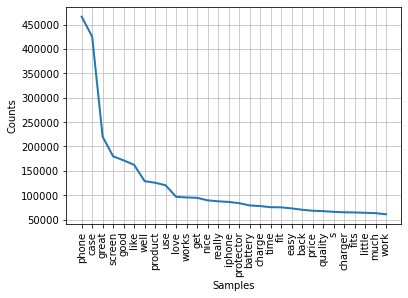

In [32]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# word cloud

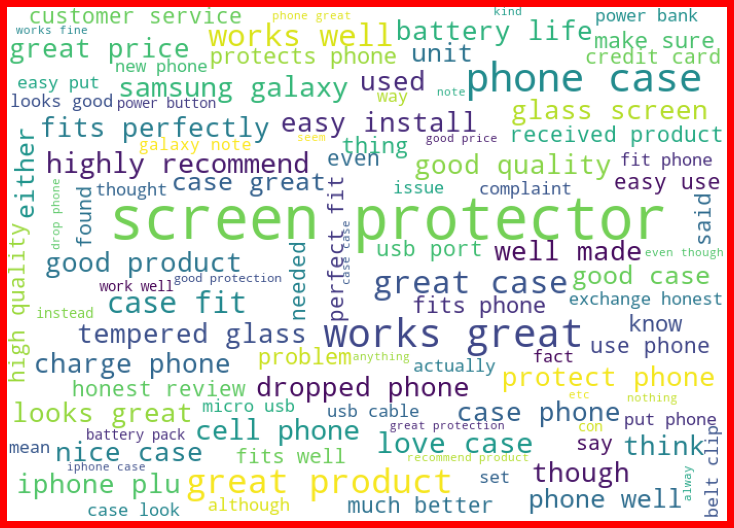

In [33]:
from wordcloud import WordCloud


review = df['Review']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(review))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# using gensim library we can generate keywords


# I have choosen 22 words because the review are quit large whereass there are some reviews with shorter length too,so tried it with 22 words  so that gensim has enough data to generate summary keywords

In [35]:
from gensim.summarization import keywords
a = []

for i in df['Review']:
# this str is to just to add more data so that gensim summarizes it. These sentence add no value to summary.
    i= i + str(". This is second sentence. This is thirddthisisjusttoadddatasothatgenismsummarisesmydatathiswillnotputanyeffect")             # this is to add two more sentences so that gensim summarizes it. These sentence add no value to summary.
    a.append(keywords(i, words=22).split('\n'))

df['Summary'] = a

In [36]:
df.head()

,IC,Review,Summary
0,7508492919,good case low price right never problems besid...,"[case, cases, look, looking, looked, pretty, c..."
1,7532385086,excited first got case loved color feel starte...,"[phone, case, cover, covers, rubber, rubberize..."
2,7887421268,good item received weeks time nice actually co...,"[case, phone, nice, good, product, great, look..."
3,8199900164,thank works time charger stopped working days ...,"[mind bought phone didnt work, thank works tim..."
4,8288853439,great far charger seem last pretty good year...,"[chargers, great far charger, charge, charged,..."


In [48]:
df['Summary'][4]# summarises that blackberry product recommened charging 

['chargers',
 'great far charger',
 'charge',
 'charged',
 'charging',
 'galaxy phone',
 'problems charges',
 'says',
 'saying',
 'fits phones',
 'fast',
 'work',
 'works',
 'like',
 'blackberry',
 'price',
 'samsung',
 'expecting',
 'usb',
 'recommend',
 'recommended',
 'good',
 'loose fit',
 'plus second']

In [38]:
df['Summary'][10]
#can summarize the product is phone and has some charging issue 

['phone',
 'charging',
 'charge',
 'case plug',
 'battery',
 'use',
 'plugged',
 'like',
 'adds extra',
 'carry',
 'carrying',
 'making feel',
 'bit',
 'great',
 'makes',
 'return',
 'returned',
 'light',
 'lights',
 'power',
 'ive seen',
 'looking',
 'look',
 'update',
 'products',
 'product']

# we have another approach that is to use RAKE which generates phrases /keywords
#let's try that also 
#It's relatively a faster method too 
#but herein we will again reload our dataframe because for rake the data needs to be more meaningful so herein i'll just remove sings and symbols,the stopwords will be taken care automatically

In [46]:
df['Summary'][130]
#we can clearly see with the summary that the product is headset as we have words call ear sound etc

['ear',
 'ears',
 'good',
 'wear',
 'wearing',
 'wears',
 'headphones',
 'headphone',
 'phone',
 'music',
 'got',
 'called',
 'calls',
 'calling',
 'sound',
 'sounded',
 'bit',
 'samsung',
 'laptop',
 'getting',
 'gets',
 'works',
 'work',
 'worked',
 'great',
 'pieces',
 'piece',
 'bluetooth stereo',
 'buttons',
 'button',
 'years',
 'product',
 'listen',
 'listening']

In [47]:
df['Review'][130]

'using product past   months bful awesome sound quality didnt found issue product easy configure connect works sony erricson w i walkman phone well laptop sound quality beats good distortion u move head   left ignorable bulky fit easily build mic good playing music call comes u atend headset volume adjustment overall good peace makes fully satisfied got looking wire hassle bought years ago still work well battery life good recharge week charged car volume adjusted easily like chat driving wonderful earphone cable connect pc directly listen music winter wonderful ear protection cold windy morning little bit heavier beginning man perfect daughters wear without holding word good product got headphones   years ago way anyone even know bluetooth stereo headphones ever since take everywhere yet give problems bluetooth things rock solid ive paired phone laptop time listening music controlling buttons ear pieces call came paused laptop music switched call talked bit hung button music automatic

In [49]:
df['Summary'][150]# phone holder asking for refund windsheild problems 

['holders',
 'phone holder',
 'vent',
 'vents',
 'mounts',
 'mount',
 'problem',
 'times',
 'otterbox',
 'time working',
 'work',
 'works',
 'adjustment',
 'adjust',
 'capacitive',
 'car',
 'cars',
 'item',
 'windshield problems',
 'capacitance detection',
 'touch',
 'day',
 'days',
 'grab',
 'detect',
 'cost',
 'broke',
 'attached',
 'yes',
 'refund']

In [ ]:
#we have another approach that is to use RAKE which generates phrases /keywords
#let's try that also 
#It's relatively a faster method too 
#but herein we will again reload our dataframe because for rake the data needs to be more meaningful so herein i'll just remove sings and symbols,the stopwords will be taken care automatically

In [50]:

df_alternate=pd.read_json(r'Cell_phones_and_Accessories.json')
df_alternate.dropna(subset=['Review'], inplace=True)


In [51]:
df_alternate = df_alternate.groupby('IC').agg({'Review': ','.join}).reset_index()
print(df_alternate[['IC','Review']])

               IC                                             Review
0      7508492919  It is such a good case for a low price. I have...
1      7532385086  I was very excited when I first got this case....
2      7887421268  Good item,Received this in about a weeks time....
3      8199900164  thank you.,Works some of the time.  The charge...
4      8288853439  Great ! So far.\nI had this charger before and...
...           ...                                                ...
48128  B01HJBS5C2  Strong, protective but slim and light. I am al...
48129  B01HJC7N4C  my sons likes it. For the price it isn't too b...
48130  B01HJCN1UC  great thanks,good cable. just be sure to know ...
48131  B01HJCN55I  Received the cable in two days and it's the be...
48132  B01HJH9IN6  Just received it and it's VERY thin. No need t...

[48133 rows x 2 columns]


In [52]:
df_alternate['Review'] = df_alternate['Review'].str.lower()

In [53]:
df_alternate["Review"] = df_alternate["Review"].str.replace(",","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace("/","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace(":","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace("'","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace("!","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace("\\","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace(".","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace("%","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace("-","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace("+","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace("=","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace(";","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace(")","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace("(","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace("?","").astype(str)
df_alternate["Review"] = df_alternate["Review"].str.replace("lol","").astype(str)


In [65]:
!pip install rake-nltk
import pandas as pd
from  rake_nltk import Rake  

r = Rake(min_length=1, max_length=2)    



def rake_implement(x,r):
     r.extract_keywords_from_text(x)
     return r.get_ranked_phrases()

df_alternate['keywords'] =df_alternate['Review'].apply(lambda x: rake_implement(x,r))
print(df_alternate['keywords'])

0        [weird cause, strongly attached, simple ive, r...
1        [would recommend, soft rubberized, slight issu...
2        [wont give, weeks time, put onsimple, protecte...
3        [thank youworks, stopped working, doesnt work,...
4        [wasnt expecting, sucks like, still use, speci...
                               ...                        
48128    [volume controls, video screen, top cover, str...
48129    [well manufactured, well made, vitalas enjoyin...
48130    [works well, well packaged, usb cable, past ye...
48131    [working within, well care, two days, price im...
48132    [would survive, package cause, mesh allow, loo...
Name: keywords, Length: 48133, dtype: object


In [55]:
df_alternate.head()

,IC,Review,keywords
0,7508492919,it is such a good case for a low price i have ...,"[weird cause, strongly attached, simple ive, r..."
1,7532385086,i was very excited when i first got this case ...,"[would recommend, soft rubberized, slight issu..."
2,7887421268,good itemreceived this in about a weeks time v...,"[wont give, weeks time, put onsimple, protecte..."
3,8199900164,thank youworks some of the time the charger h...,"[thank youworks, stopped working, doesnt work,..."
4,8288853439,great so far\ni had this charger before and i...,"[wasnt expecting, sucks like, still use, speci..."


In [57]:
df_alternate['keywords'][6]
#talking about note 4

['yeari needed',
 'would order',
 'would allow',
 'works perfectly',
 'original packaging',
 'note 4',
 'functions perfectly',
 'droid x',
 'continue working',
 'company made',
 'cant seem',
 'stock charger',
 'backup charger',
 'new one',
 'long thin',
 'doesnt get',
 'charging base',
 'charger',
 'one',
 'long',
 'get',
 'charging',
 'base',
 'worked',
 'well',
 'waythe',
 'wall',
 'used',
 'use',
 'twice',
 'total',
 'together',
 'taped',
 'take',
 'straighten',
 'replace',
 'problems',
 'plugged',
 'phone',
 'perfect',
 'noticed',
 'meant',
 'maybe',
 'job',
 'inoperable',
 'got',
 'flexible',
 'fast',
 'directly',
 'difference',
 'cosmetic',
 'cord',
 'completely',
 'comes',
 'chages',
 'came']

In [66]:
df_alternate['keywords'][98]

['volume louder',
 'vibrate feature',
 'verizon rep',
 'various presses',
 'usb charger',
 'two devices',
 'top comfort',
 'thing die',
 'sweet spot',
 'safe method',
 'plus side',
 'plantronics 320',
 'perfect line',
 'people winding',
 'pairup process',
 'multifunction button',
 'money earpiece',
 'microphone however',
 'microphone audio',
 'maximizes comfort',
 'main button',
 'main body',
 'long periods',
 'lg vx9800',
 'lets consider',
 'kept seeing',
 'ill probably',
 'hellohello hello',
 'forcing us',
 'every aspect',
 'emergency vehicles',
 'drove home',
 'doesnt take',
 'dials people',
 'definite progress',
 'day reception',
 'constantly turning',
 'confuses people',
 'clear winner',
 'blue strobe',
 'blackberry curve',
 'bit awkward',
 'also hit',
 'also allows',
 'right ear',
 'jabra headset',
 'headset however',
 'either ear',
 'eargreat headset',
 'ear hook',
 'ear canal',
 'start pairing',
 'sound typically',
 'sound quality',
 'sound loud',
 'lg8100 pairing',
 'dont wait

In [67]:
df_alternate['keywords'][40000]

['works well',
 'wont hurt',
 'well worth',
 'usually plug',
 'standard port',
 'significant interference',
 'quick however',
 'purchased 2',
 'okfinally tried',
 'much current',
 'made well',
 'impressed ive',
 'goodthis device',
 'good instructions',
 'friend needs',
 'fast charging',
 'everything usb',
 'equipment basically',
 'engine noise',
 'dual chargers',
 'bluetooth receiver',
 'bestperfect size',
 '70 percent',
 '57 percent',
 'phone said',
 'phone needs',
 'new phone',
 'thw car',
 'charging use',
 'cable away',
 'phone',
 'use',
 'car',
 'cable',
 'whine',
 'way',
 'today',
 'step',
 'speakers',
 'shifter',
 'settled',
 'price',
 'pizza',
 'output',
 'one',
 'moneyworks',
 'lots',
 'jack',
 'hear',
 'half',
 'great',
 'get',
 'gas',
 'fine',
 'far',
 'electronic',
 'detects',
 'concerned',
 'comes',
 'charged',
 'adjusts']

In [ ]:
#the only issue with rake keywords is that a huge amount of words are generated as compared to genism library summary

In [ ]:
# so ill save the summary column to my final output(as i have there limited words generated summary (ie 22 words))

# to calculate average rating,minimum rating,maximum rating using groupby and min max mean functions

In [68]:
import pandas as pd
rating_df=pd.read_json(r'Cell_phones_and_Accessories.json')

In [69]:
df2= rating_df.groupby(['IC']).agg({'Rating': 'mean'}).reset_index()
df2.rename(columns={'Rating':'AVG Rating'},inplace=True)
df2.head(10)

,IC,AVG Rating
0,7508492919,4.300000
1,7532385086,3.285714
2,7887421268,3.538462
3,8199900164,3.750000
4,8288853439,3.818182
5,8288862993,3.656250
6,828886922X,4.333333
7,8288878881,3.977273
8,9578085451,4.250000
9,961301375X,3.923077


In [70]:
df3=rating_df.groupby(['IC']).agg({'Rating':'max'}).reset_index()
df3.rename(columns={'Rating':'MAX Rating'},inplace=True)
df3.head(10)

,IC,MAX Rating
0,7508492919,5
1,7532385086,5
2,7887421268,5
3,8199900164,5
4,8288853439,5
5,8288862993,5
6,828886922X,5
7,8288878881,5
8,9578085451,5
9,961301375X,5


In [71]:
df4=rating_df.groupby(['IC']).agg({'Rating':'min'}).reset_index()
df4.rename(columns={'Rating':'MIN Rating'},inplace=True)
df4.head(10)

,IC,MIN Rating
0,7508492919,1
1,7532385086,1
2,7887421268,1
3,8199900164,2
4,8288853439,1
5,8288862993,1
6,828886922X,3
7,8288878881,1
8,9578085451,3
9,961301375X,1


In [72]:
final_df=pd.merge((pd.merge(df2, df3,how='inner',on=['IC'])),df4,how='inner',on='IC')
final_df.head(10)


,IC,AVG Rating,MAX Rating,MIN Rating
0,7508492919,4.300000,5,1
1,7532385086,3.285714,5,1
2,7887421268,3.538462,5,1
3,8199900164,3.750000,5,2
4,8288853439,3.818182,5,1
5,8288862993,3.656250,5,1
6,828886922X,4.333333,5,3
7,8288878881,3.977273,5,1
8,9578085451,4.250000,5,3
9,961301375X,3.923077,5,1


In [80]:
output_df=pd.merge(final_df, df, on='IC')
output_df.head()

,IC,AVG Rating,MAX Rating,MIN Rating,Review,Summary
0,7508492919,4.300000,5,1,good case low price right never problems besid...,"[case, cases, look, looking, looked, pretty, c..."
1,7532385086,3.285714,5,1,excited first got case loved color feel starte...,"[phone, case, cover, covers, rubber, rubberize..."
2,7887421268,3.538462,5,1,good item received weeks time nice actually co...,"[case, phone, nice, good, product, great, look..."
3,8199900164,3.750000,5,2,thank works time charger stopped working days ...,"[mind bought phone didnt work, thank works tim..."
4,8288853439,3.818182,5,1,great far charger seem last pretty good year...,"[chargers, great far charger, charge, charged,..."


In [81]:
output_df.tail()

,IC,AVG Rating,MAX Rating,MIN Rating,Review,Summary
48128,B01HJBS5C2,3.250000,5,1,strong protective slim light already ordering ...,"[casing, phone, protect, protected, protects, ..."
48129,B01HJC7N4C,4.600000,5,3,sons likes price isnt bad recently received fr...,"[phone headset, apps, app, device, phones, adj..."
48130,B01HJCN1UC,4.727273,5,4,great thanks good cable sure know length longe...,"[cords, kindle, kindles, good cable, need long..."
48131,B01HJCN55I,4.454545,5,2,received cable two days best ft cable recharg...,"[charged, charges, great price, time, cable, c..."
48132,B01HJH9IN6,2.833333,5,1,"received thin need put ""max protection"" packag...","[cases, cool case, phone, style nice, cracked,..."


In [82]:
output_df.to_json(r'C:\Users\COMP\project_nlp\Output_DataFrame.json')

In [ ]:
#my trained model in this case is the dataframe only for the purpose of summary i took review and ic data
#for the purpose of rating i took ratng and ic data
#thereby saving the respective dataframes  in json format

In [87]:
train_df=df

In [88]:
train_df.head()

,IC,Review
0,7508492919,good case low price right never problems besid...
1,7532385086,excited first got case loved color feel starte...
2,7887421268,good item received weeks time nice actually co...
3,8199900164,thank works time charger stopped working days ...
4,8288853439,great far charger seem last pretty good year...


In [ ]:
#THIS is my cleaned dataframe used for generating keywords and making a loop over this to generate keywords using genism library

In [89]:
train_df.to_json(r'C:\Users\COMP\project_nlp\train_DataFrame.json')

# lets have a final look at the output with 48133 unique IC and summary and avg,min and max rating for each review for every particular product

In [92]:
output_df.head()

,IC,AVG Rating,MAX Rating,MIN Rating,Review,Summary
0,7508492919,4.300000,5,1,good case low price right never problems besid...,"[case, cases, look, looking, looked, pretty, c..."
1,7532385086,3.285714,5,1,excited first got case loved color feel starte...,"[phone, case, cover, covers, rubber, rubberize..."
2,7887421268,3.538462,5,1,good item received weeks time nice actually co...,"[case, phone, nice, good, product, great, look..."
3,8199900164,3.750000,5,2,thank works time charger stopped working days ...,"[mind bought phone didnt work, thank works tim..."
4,8288853439,3.818182,5,1,great far charger seem last pretty good year...,"[chargers, great far charger, charge, charged,..."
